<a href="https://colab.research.google.com/github/kvelez-iastate/S2021_ME592/blob/Homework1/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
Due February 15th, 2021

Kimberly Velez


Kyle Swanton

In [ ]:
# Mount session to Homework 1 folder in Google Drive
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks/ME592/ME592_HW1', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/mnt


In [ ]:
# Import needed packages
import numpy as np

import scipy

import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

import pandas as pd


completed!


# 2.1 Images 
Task:
1. Load sudoku-original.png image in grayscale mode. **COMPLETE**
2. Plot the histogram of intensities. **COMPLETE**
3. Choose 4 appropriate points and perform a Perspective Transformation to obtain
the sudoku as a proper square. **COMPLETE**

## 1. Load sudoku-original.png image in grayscale mode

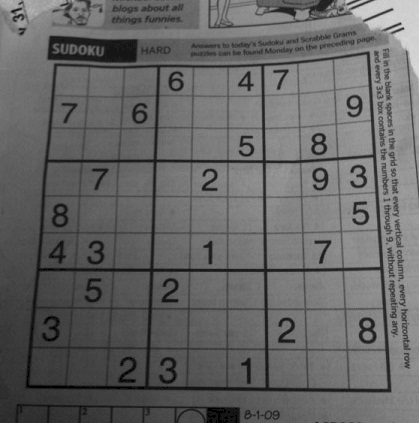

In [ ]:
# 1. Load sudoku-original.png image in grayscale mode

sudoku_img = cv2.imread('/content/mnt/My Drive/Colab Notebooks/ME592/ME592_HW1/sudoku-original.png',0) # 0 here brings it in as grayscale
cv2_imshow(sudoku_img)

## 2. Plot the histogram of intensities

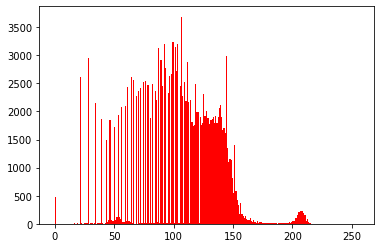

In [ ]:
# 2. Plot the histogram of intensities

# flatten the image (make the 2D into 1D)
flat_sudoku = sudoku_img.flatten()

# number of bins in the histogram, grayscale values
bins = 256 

# range of the bins, grayscale values
range = [0,256]

# plot the histogram in red
_ = plt.hist(flat_sudoku,bins,range, color = 'r')

## 3. Choose 4 appropriate points and perform a Perspective Transformation to obtain the sudoku as a proper square

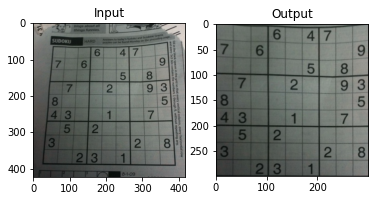

In [ ]:
# 3. Choose 4 appropriate points and perform a Perspective Transformation to obtain the sudoku as a proper square
# Tutorial: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

# Read in the image again, this time without greyscale
sudoku_img = cv2.imread('/content/mnt/My Drive/Colab Notebooks/ME592/ME592_HW1/sudoku-original.png')

# using .shape to return number of rows, number of columns, and number of channels
# channels here refers to the number of colors (RGB - 3)
rows,cols,ch = sudoku_img.shape

# defining the corner locations for the original image and the image we want to create
new_corners = np.float32([[56,65],[368,52],[28,387],[389,390]])
original_corners = np.float32([[0,0],[300,0],[0,300],[300,300]])

# create a transformation matrix from the original points to the new points
transform_matrix = cv2.getPerspectiveTransform(new_corners,original_corners)

# apply the transformation matrix to the image to make a new 300x300 image
new_sudoku_img = cv2.warpPerspective(sudoku_img,transform_matrix,(300,300))

# plot the old image and the new image next to eachother
plt.subplot(121),plt.imshow(sudoku_img),plt.title('Input')
plt.subplot(122),plt.imshow(new_sudoku_img),plt.title('Output')
plt.show()

# 2.2 Time Series
Data: Experimental data used to analyze appliances energy use in an energy efficient
building. The data set is collected at a frequency of 10 min for about 4.5 months. The
house temperature and humidity conditions were monitored with a ZigBee wireless sensor
network. Each wireless node transmitted the temperature and humidity conditions at a
period of around 3.3 min. Then, the wireless data was averaged for 10 minute periods.
The energy data was logged every 10 minutes with m-bus energy meters. Weather from
the nearest airport weather station (Chievres Airport, Belgium) was downloaded from
a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Random variable is included in
1
the data set for testing the regression models and to filter out non predictive attributes
(parameters). This data is adopted from the UCI machine learning repositories [1] and
several aspects of the data were analyzed [2]. Our motivation is to explore some aspects
of this time series data.
Task: Load the data (energydata complete.csv) and perform the following analysis.
1. Plot the appliances energy consumption for whole period and a closer look at any
one week of consumption.
2. Plot heatmap of hourly consumption of appliances for a week. An example heatmap
looks like Figure 1.
3. Plot the histogram of energy consumption of appliances.
4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy
consumption vs. NSM.
5. Plot appliances energy consumption vs. Press mm Hg.
6. It is observed that the major contributing factors for the energy consumption
among all other features is NSM and Press mm Hg. Comment on it.
Figure 1: Example heatmap of hourly energy consumption of appliances over a week

In [ ]:
# bring in ploting packages
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# read in the energy data with panda
energydata = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/ME592/ME592_HW1/energydata_complete.csv')

# convert engergy data to numpy array
energydata_py = energydata.to_numpy()



## 1. Plot the appliances energy consumption for whole period and a closer look at any one week of consumption.

Text(0.5, 1.0, 'Energy Consumption Over 1/13/2016 - 1/20/2016')

<Figure size 432x288 with 0 Axes>

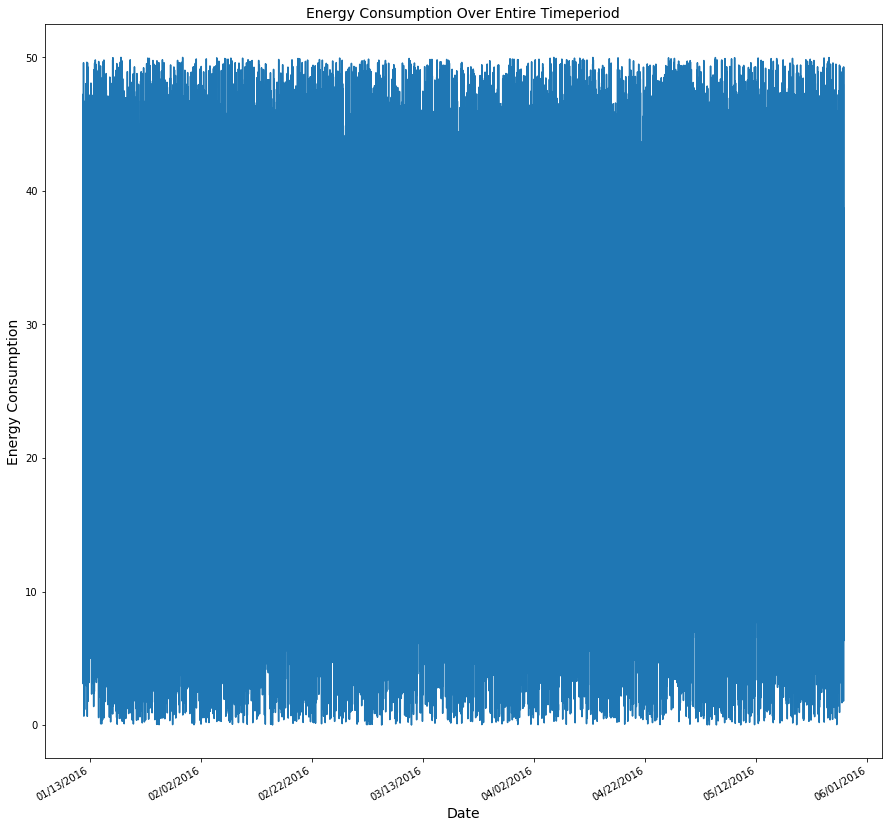

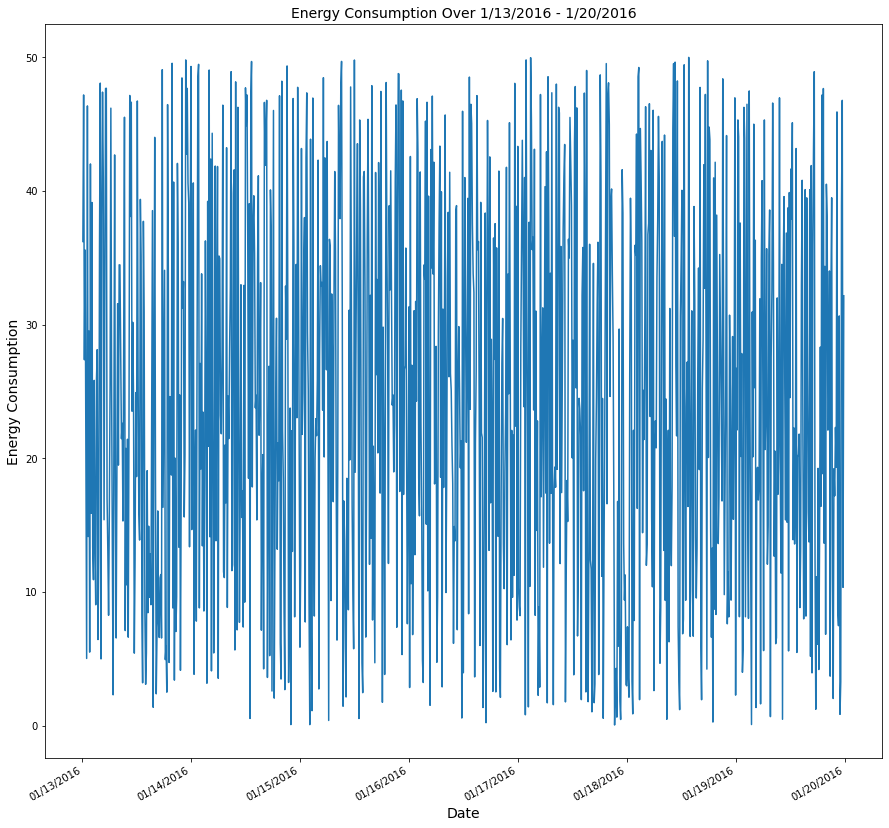

In [99]:
# 1. Plot the appliances energy consumption for whole period and a closer look at any one week of consumption.

# pull date data out of array and make into a format that .plot() can use
energydata_date = energydata_py[:,0]
energydata_date = [dt.datetime.strptime(d,'%m/%d/%Y %H:%M') for d in energydata_date]

# pull consumption data out of array
energydata_consumption = energydata_py[:,27]

# create new figure
plt.figure(0)
plt.figure(figsize=(15, 15))
# plot the energy consumption for the whole time period
plt.plot(energydata_date,energydata_consumption)
# format dates to look nice
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.gcf().autofmt_xdate()
plt.xlabel("Date", size=14)
plt.ylabel("Energy Consumption", size=14)
plt.title("Energy Consumption Over Entire Timeperiod", size=14)

# create new figure
plt.figure(1)
plt.figure(figsize=(15, 15))
# plot the energy consumption for 1/13/2016 - 1/19/2016
plt.plot(energydata_date[187:1194],energydata_consumption[187:1194])
# format dates to look nice
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()
plt.xlabel("Date", size=14)
plt.ylabel("Energy Consumption", size=14)
plt.title("Energy Consumption Over 1/13/2016 - 1/20/2016", size=14)


## 2. Plot heatmap of hourly consumption of appliances for a week. An example heatmap looks like Figure 1.

Text(0.5, 1.0, 'Hourly Energy Consumption ')

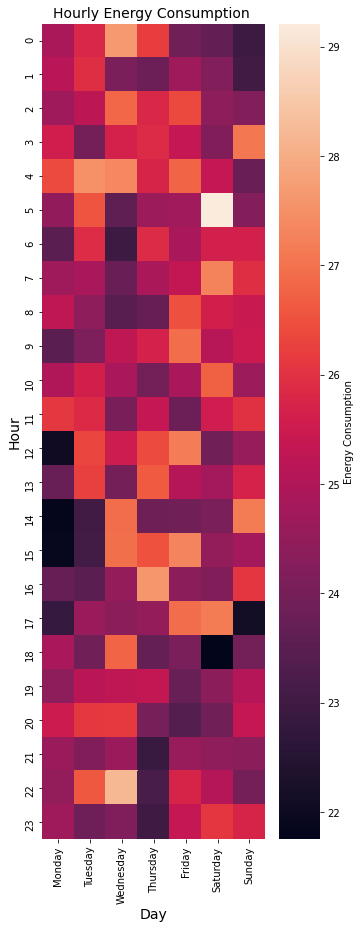

In [60]:
# 2. Plot heatmap of hourly consumption of appliances for a week. An example heatmap looks like Figure 1.
# helpful tutorial: https://datavizpyr.com/heatmaps-with-seaborn-in-python/

import seaborn as sns

# Read in the dates
energydata_date = energydata_py[:,0]
# make an array of only the days
energydata_dateDay = [dt.datetime.strptime(d,'%m/%d/%Y %H:%M').date() for d in energydata_date]
# make an array of only the time
energydata_dateTime = [dt.datetime.strptime(d,'%m/%d/%Y %H:%M').time() for d in energydata_date]
# make an array of the consumption data
energydata_consumption = energydata_py[:,27]
# make a matrix of day,time,consumption
cons_array = np.vstack((energydata_dateDay,energydata_dateTime,energydata_consumption)).T
# make the matrix into a padas dataframe
energydata_pd = pd.DataFrame(cons_array, columns=['Day','Time','Consumption'])
# for some reason the consumption need to be redefined as a number
energydata_pd['Consumption'] = energydata_pd['Consumption'].astype(float)
# make another column in energydata for the weekdays (0-Monday to 6-Sunday)
energydata_pd['Weekday'] = [i.strftime("%A") for i in energydata_dateDay]
# make another column in energydata for the hours
energydata_pd['Hour'] = [j.hour for j in energydata_dateTime]

# group into Weekday and Hour, making the mean of the Consumption and keeping Weekday/Hour in columns
WeekdayHourGroup = energydata_pd.groupby(['Weekday','Hour'],sort=False).agg(['mean'])
WeekdayHourGroup.columns = WeekdayHourGroup.columns.droplevel(0)
WeekdayHourGroup.reset_index(inplace=True)

# make a pivot table of the data with weekday on x, and hour on y
heatmap_data = pd.pivot_table(WeekdayHourGroup, values = 'mean',index=['Hour'],columns='Weekday')
# automatically the weekday order is alphabetical, reordering to week order
columnorder = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = heatmap_data.reindex(columnorder, axis=1)

# create heatmap with labels
plt.figure(figsize=(5, 15))
sns.heatmap(heatmap_data,cbar_kws={'label':'Energy Consumption'})
plt.xlabel("Day", size=14)
plt.ylabel("Hour", size=14)
plt.title("Hourly Energy Consumption ", size=14)



## 3. Plot the histogram of energy consumption of appliances.

Text(0, 0.5, 'Count')

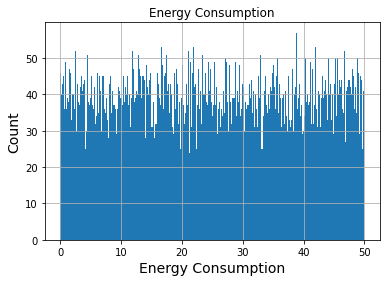

In [93]:
# 3. Plot the histogram of energy consumption of appliances.

# read in the energy data with pandas
energydata = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/ME592/ME592_HW1/energydata_complete.csv')

# create historgram

_ = energydata.hist(['Energy Consumption'],bins=500)
plt.xlabel('Energy Consumption',size=14)
plt.ylabel('Count',size=14)


## 4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM.

Text(0.5, 1.0, 'Energy Consumption vs. # Of Seconds From Midnight ')

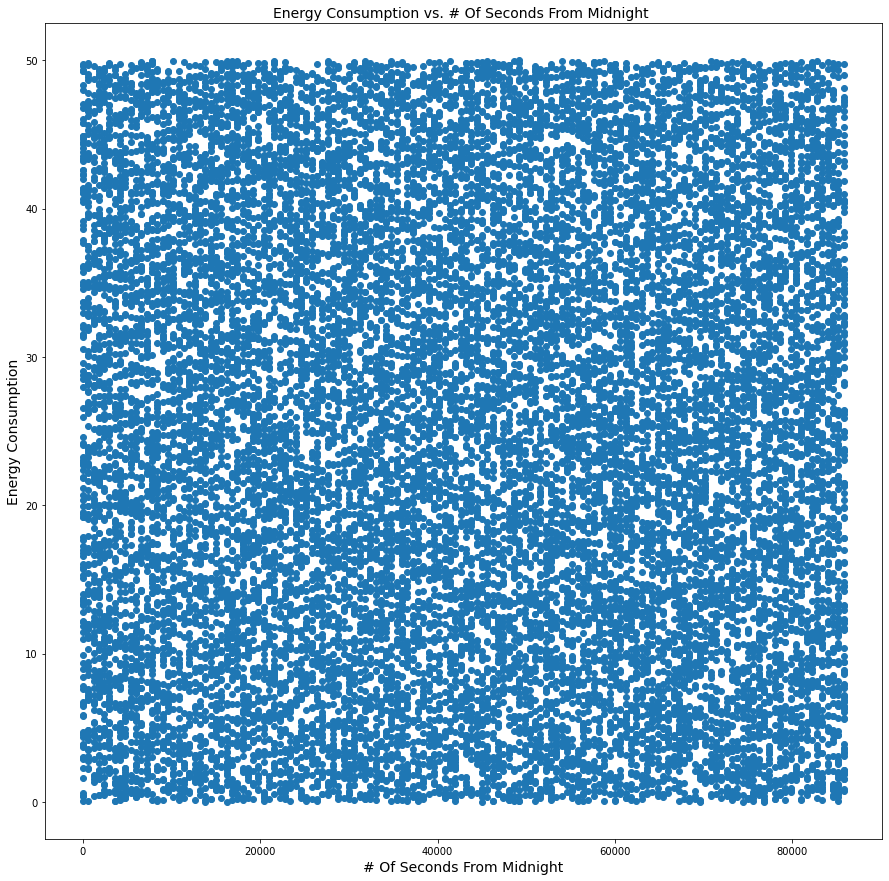

In [85]:
# 4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM.

# read in the energy data with pandas
from datetime import date

# read in energy data
energydata = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/ME592/ME592_HW1/energydata_complete.csv')
# pulls date from energy data
energydata_date = energydata['date']
# makes a datetime.time from the dates
energydata_time = [dt.datetime.strptime(d,'%m/%d/%Y %H:%M').time() for d in energydata_date]
# make a datetime.time for midnight
midnight = dt.time(0,0)
# make a datetime.timedelta between the time and midnight
NSM = [(dt.datetime.combine(date.min, energydata_time[i]) - dt.datetime.combine(date.min, midnight)) for i in range(len(energydata_time))]
# pull out the seconds in the timedelta
NSM = [NSM[i].seconds for i in range(len(NSM))]

# plot energy consumption vs. NSM as a scatter plot
plt.figure(figsize=(15, 15))
plt.plot(NSM,energydata_consumption,'o')
plt.xlabel("# Of Seconds From Midnight", size=14)
plt.ylabel("Energy Consumption", size=14)
plt.title("Energy Consumption vs. # Of Seconds From Midnight ", size=14)


## 5. Plot appliances energy consumption vs. Press mm Hg.

Text(0.5, 1.0, 'Energy Consumption vs. Pressure [mmHg] ')

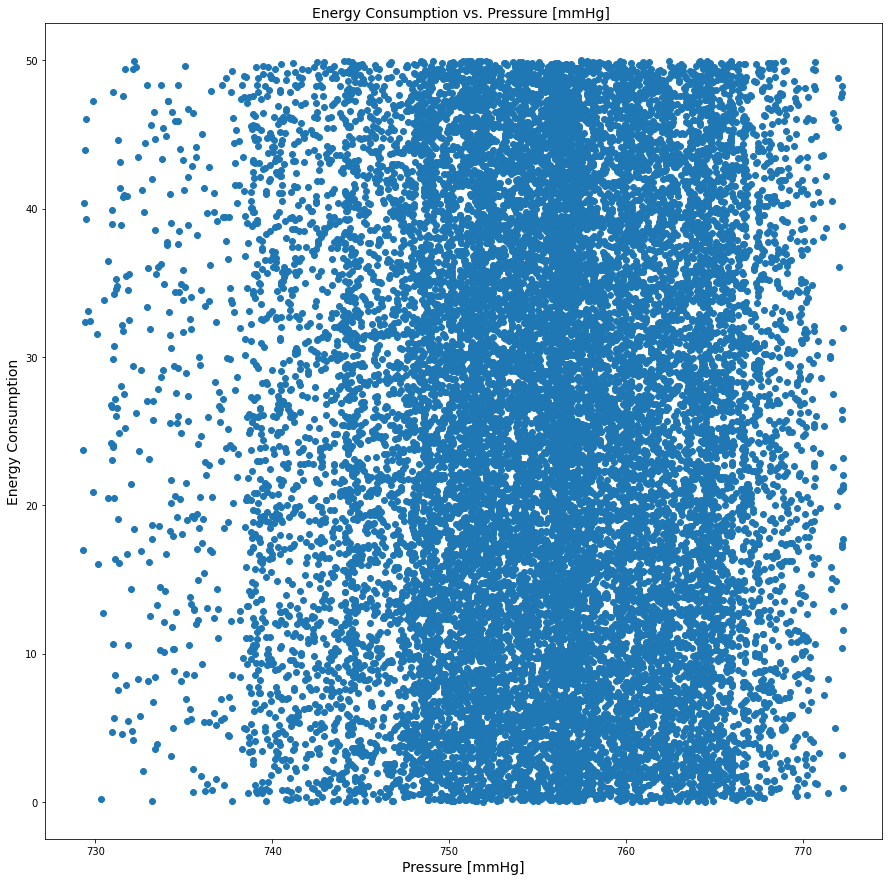

In [97]:
# 5. Plot appliances energy consumption vs. Press mm Hg.

PressmmHg = energydata['Press_mm_hg']

plt.figure(figsize=(15, 15))
plt.plot(PressmmHg,energydata_consumption,'o')
plt.xlabel("Pressure [mmHg]", size=14)
plt.ylabel("Energy Consumption", size=14)
plt.title("Energy Consumption vs. Pressure [mmHg] ", size=14)

## 6. It is observed that the major contributing factors for the energy consumption among all other features is NSM and Press mm Hg. Comment on it. 

**Comments**

At first glance there seems to be a pattern emerging with the barometric pressure, but once we remember that the average barometric pressure is 760 mmHg then the pattern is less meaningful. 

Both sets of data do not have meaningful visible patterns, but are contributing factors for energy consumption. Therefore majorly contributing features may not be human discernable. In order to test for contributing features, we must rely on means other than visual interpretation. 

# 2.3 Multi - Variate
Data: The NASA data set comprises different sizes of NACA 0012 airfoils at various wind
tunnel speeds and angles of attack. The span of the airfoil and the observer position were
the same in all of the experiments. This problem has the following inputs:
1. Frequency, in Hz.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is Scaled sound pressure level, in decibels.

Task: Load the data and Compute the following descriptive statistics of the data:
1. Mean
2. Variance (or Standard Deviation)
3. Median
4. Kurtosis
5. Skewness
6. Range

In [ ]:
# Load the required modules
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

# import the data file
NASAdata = np.genfromtxt('/content/mnt/MyDrive/Colab Notebooks/ME592/ME592_HW1/airfoil_self_noise.dat', delimiter='\t')

# create an array of only the sound pressure data column
sound_pressure_data = NASAdata[:,5]

# compute the summary statistics
mean = sound_pressure_data.mean()
std = sound_pressure_data.std()
median = np.median(sound_pressure_data)
kurtosis = scipy.stats.kurtosis(sound_pressure_data)
skewness = scipy.stats.skew(sound_pressure_data)
range = np.ptp(sound_pressure_data)
min = np.min(sound_pressure_data)
max = np.max(sound_pressure_data)

# report the summary statistics
print("mean = %.3f" %mean)
print("standard deviation = %.3f" %std)
print("median = %.3f" %median)
print("kurtosis = %.3f" %kurtosis)
print("skewness = %.3f" %skewness)
print("range = %.3f" %range)

mean = 124.836
standard deviation = 6.896
median = 125.721
kurtosis = -0.317
skewness = -0.419
range = 37.607
